<font color='red'>Question:</font> What are supervised learning and unsupervised learning?

Supervised learning is a machine learning approach that’s defined by its use of labeled datasets. These datasets are designed to train or “supervise” algorithms into classifying data or predicting outcomes accurately. Using labeled inputs and outputs, the model can measure its accuracy and learn over time.

Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns in data without the need for human intervention (hence, they are “unsupervised”).

Unsupervised learning models are used for three main tasks: clustering, association and dimensionality reduction:

<font color='red'>Assignment:</font> Load 'cluster_data.csv' and visualize the data. How many clusters do you think it has?

In [4]:
import pandas as pd
df=pd.read_csv('cluster_data.csv')
df

,x,y
0,-81.813522,-8.072301
1,-66.353560,-8.760227
2,-65.725456,-8.833906
3,-106.446292,-3.051862
4,-100.364080,-5.569121
...,...,...
245,-145.245861,8.325057
246,-123.438448,14.323834
247,-151.052949,7.578415
248,-123.884147,15.027128


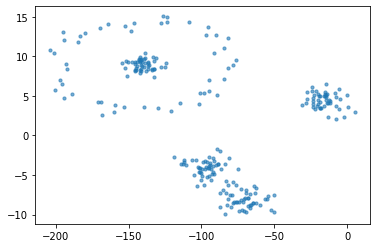

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.x, df.y, alpha = 0.6, s=10)

At one look, I feel it has 4 clusters.

If the clusters one inside the other can be considered oen, then I bet the number of clusters is 3. 

It is a tough guess at that.

<font color='red'>Assignment:</font> Train a **KMeans** model.

In [49]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
#df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

<font color='red'>Assignment:</font> Visualize the clustering results. **Hint:** use Kmeans.labels_ and plt.scatter(x, y, c="put_your_label_data_here").

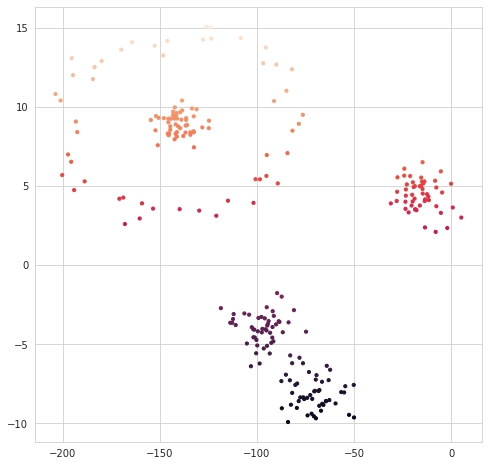

In [50]:
#KMeans.labels_

import matplotlib.pyplot as plt
plt.scatter(df.x, df.y, c=df.y, s=10)

<font color='red'>Question:</font> Is the result what you expect? Why?

<font color='red'>Assignment:</font> Rescale the data then train KMeans.

In [63]:
#Scaling the data.
from sklearn.preprocessing import StandardScaler

x = []
for i in df.x:
  x.append([i])

#df.drop(['cluster','cen_x','cen_y','c'], axis = 1,inplace=True)

scaler=StandardScaler().fit(df.values)
standard_df= scaler.transform(df.values)
standard_df = pd.DataFrame(standard_df)

standard_df.rename(columns={0: 'scaled_x', 1: 'scaled_y'}, inplace=True)

standard_df



,scaled_x,scaled_y
0,0.216592,-1.405771
1,0.519440,-1.501271
2,0.531744,-1.511500
3,-0.265944,-0.708814
4,-0.146798,-1.058270
...,...,...
245,-1.025995,0.870574
246,-0.598806,1.703347
247,-1.139751,0.766922
248,-0.607537,1.800981


In [67]:
#After scaling
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
standard_df['cluster'] = kmeans.fit_predict(standard_df[['scaled_x', 'scaled_y']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
standard_df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
standard_df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
standard_df['c'] = standard_df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

standard_df

,scaled_x,scaled_y,cluster,cen_x,cen_y,c
0,0.216592,-1.405771,1,0.173115,-1.120932,#81DF20
1,0.519440,-1.501271,1,0.173115,-1.120932,#81DF20
2,0.531744,-1.511500,1,0.173115,-1.120932,#81DF20
3,-0.265944,-0.708814,1,0.173115,-1.120932,#81DF20
4,-0.146798,-1.058270,1,0.173115,-1.120932,#81DF20
...,...,...,...,...,...,...
245,-1.025995,0.870574,0,-0.929622,0.956239,#DF2020
246,-0.598806,1.703347,0,-0.929622,0.956239,#DF2020
247,-1.139751,0.766922,0,-0.929622,0.956239,#DF2020
248,-0.607537,1.800981,0,-0.929622,0.956239,#DF2020


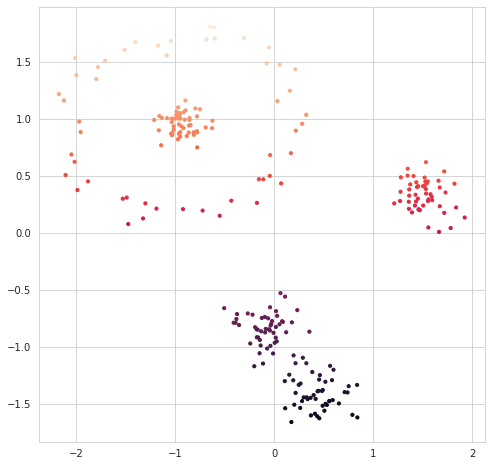

In [71]:
#print(KMeans.labels_)
#Plot after scaling

import matplotlib.pyplot as plt
plt.scatter(standard_df.scaled_x, standard_df.scaled_y, c=standard_df.scaled_y, s=10)

<font color='red'>Question:</font> Is the result improved compared with previous result before scaling? Is it able to correctly classify all the clusters? Why? Please describe how **KMeans** works as it relates to the data.

Decide the number of clusters (k)
Select k random points from the data as centroids
Assign all the points to the nearest cluster centroid
Calculate the centroid of newly formed clusters
Repeat steps 3 and 4.

#How KMeanas works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:

The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved.



<font color='red'>Question:</font> What are the important hyperparameters for **KMeans**? How do they affect results?

random_state
This is setting a random seed. It is useful if we want to reproduce exact clusters over and over again. We can set it to any number we want.

n_clusters
We need to provide the algorithm with the number of clusters that we want. Standard literature suggests we use the elbow method to determine how many clusters we need and it works well for Scikits’ cleaned theoretical datasets. In reality, this is only an initial guess. 

init
This is where you can set the initial cluster centroids.

n_init = By default is 10 and so the algorithm will initialize the centroids 10 times and will pick the most converging value as the best fit.


tol = If we set this to a higher value, then it implies that we are willing to tolerate a larger change in inertia, or change of loss, before we declare convergence (sort of like how fast are we converging). So if the change of inertia is less than the value specified by tol, then the algorithm will stop iterating and declare convergence even if it has completed fewer than max_iter rounds. Keep it at a low value to scan the entire feature space.

max_iter = There are n_init runs in general and each run iterates max_iter times, i.e., within a run, points will be assigned to different clusters and the loss calculated for max_iter times. If you keep max_iter at a higher value, then you are guaranteed that you have explored the entire feature space, but often this comes at the cost of diminishing returns.

<font color='red'>Question:</font> What information does attribute **inertia_** of **KMeans** provide?

The Inertia or within cluster of sum of squares value gives an indication of how coherent the different clusters are.

 So the Inertia simply computes the squared distance of each sample in a cluster to its cluster center and sums them up. This process is done for each cluster and all samples within that data set. The smaller the Inertia value, the more coherent are the different clusters. When as many clusters are added as there are samples in the data set, then the Inertia value would be zero.

<font color='red'>Assignment:</font> Plot **inertia_** value versus **n_clusters**.

In [95]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


# scaled_x = []
# for i, j in zip(standard_df['scaled_x'], standard_df['scaled_y']):
#   scaled_x.append([i, j])


# inertia_list = []
# for num_clusters in range(1, 11):
#     kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
#     kmeans_model.fit(standard_df.scaled_x,standard_df.scaled_y)
#     inertia_list.append(kmeans_model.inertia_)
    
# # plot the inertia curve
# plt.plot(range(1,11),inertia_list)
# plt.scatter(range(1,11),inertia_list)
# plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
# plt.xlabel("Number of Clusters", size=13)
# plt.ylabel("Inertia Value", size=13)
# plt.title("Different Inertia Values for Different Number of Clusters", size=17)

<font color='red'>Question:</font> How many clusters should we choose here based on the above plot? Is this the correct choice?

Dendrogram is used to choose the number of clusers.


A dendrogram is a tree-like diagram that records the sequences of merges or splits.

Whenever we merge two clusters, a dendrogram will record the distance between these clusters and represent it in graph form. 

<font color='red'>Question:</font> What is **Elbow Method**? Does it always work?

Elbow method is one of the most popular method used to select the optimal number of clusters by fitting the model with a range of values for K in K-means algorithm. Elbow method requires drawing a line plot between SSE (Sum of Squared errors) vs number of clusters and finding the point representing the “elbow point” (the point after which the SSE or inertia starts decreasing in a linear fashion).

<font color='red'>Assignment:</font> Train an **AgglomerativeClustering** model instead of KMeans.

In [78]:
from sklearn.cluster import AgglomerativeClustering
cluster_agglomerative = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
#cluster_agglomerative.fit(standard_df.scaled_x,standard_df.scaled_y)
#cluster.fit_predict(df.x)

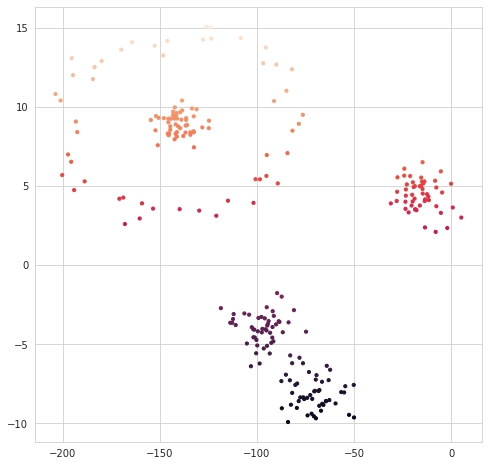

In [75]:
import matplotlib.pyplot as plt
plt.scatter(df.x, df.y, c=df.y, s=10)

<font color='red'>Assignment:</font> Visualize the clustering results.

3Dendrograms are hierarchical plots of clusters where the length of the bars represent the distance to the next cluster centre.

<font color='red'>Question:</font> How does hierarchecial clustering work?

Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together, and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together.

<font color='red'>Assignment:</font> Train a **DBSCAN** model.


In [85]:
from sklearn.cluster import dbscan
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [86]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [88]:
# Creating data points in the form of a circle
df_dbscan=pd.DataFrame(PointsInCircum(500,1000))
df_dbscan=df_dbscan.append(PointsInCircum(300,700))
df_dbscan=df_dbscan.append(PointsInCircum(100,300))

# Adding noise to the dataset
df_dbscan=df_dbscan.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

<font color='red'>Assignment:</font> Visualize the clustering results.

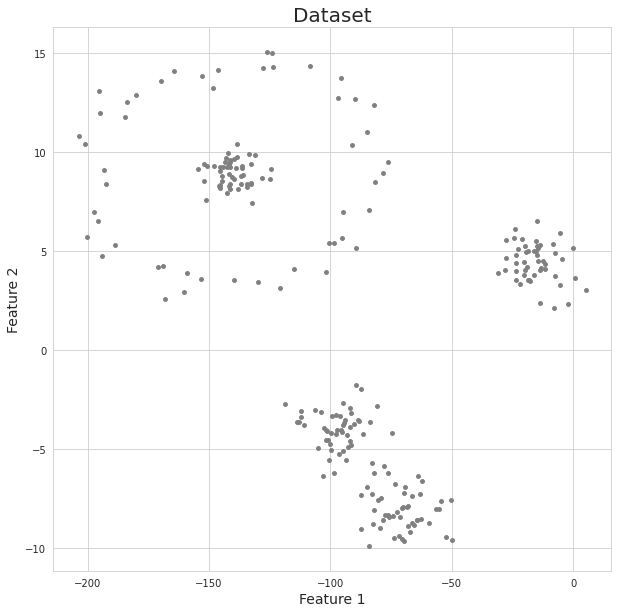

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(df['x'],df['y'],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<font color='red'>Assignment:</font> Tune hyperparameters to make the clustering results more reasonable.

Hyperprarameters of DBScan cluster

epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

metricstr, or callable, default=’euclidean’
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a Glossary, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.

metric_paramsdict, default=None
Additional keyword arguments for the metric function.

New in version 0.19.

algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

leaf_sizeint, default=30
Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

pfloat, default=None
The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2 (equivalent to the Euclidean distance).

n_jobsint, default=None
The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

In [89]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

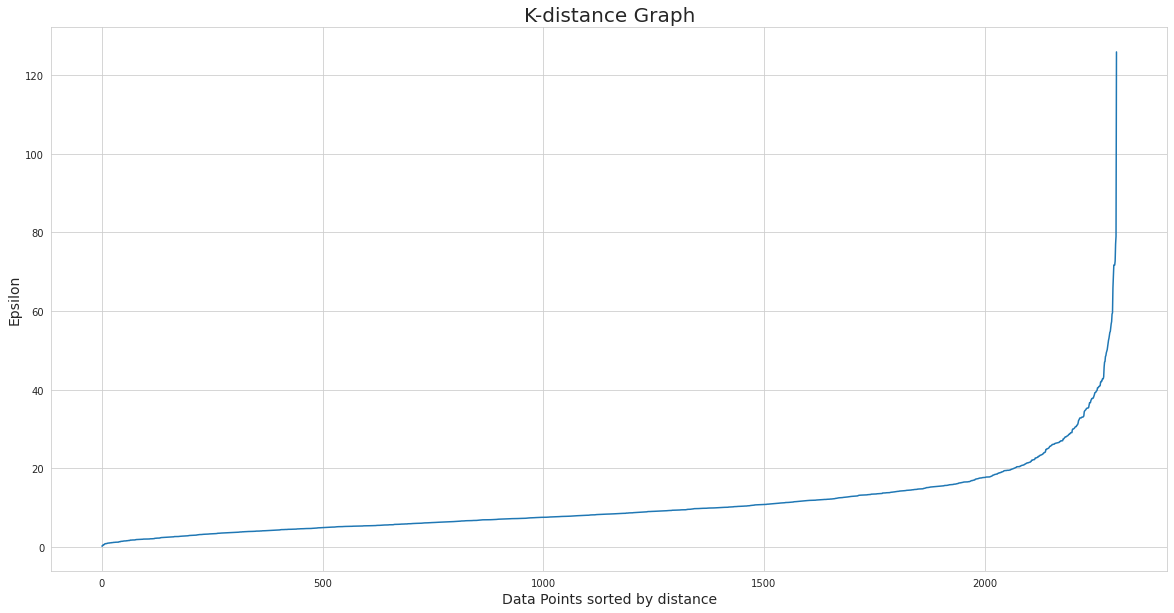

In [96]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [90]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

In [91]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

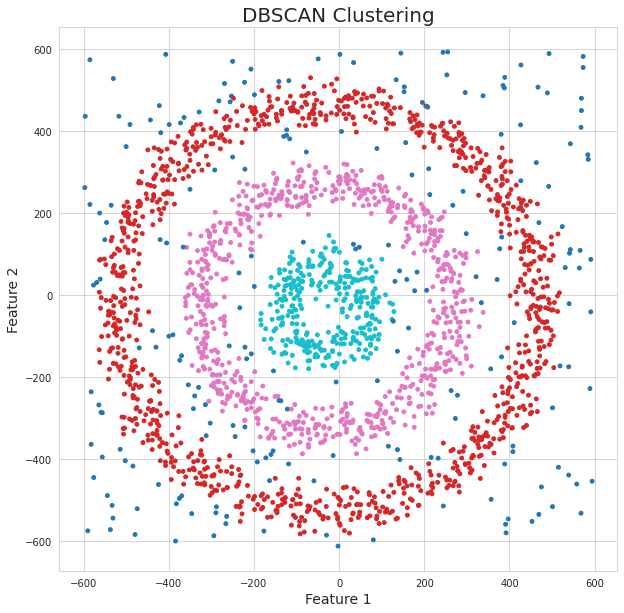

In [93]:
# Plotting the resulting clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<font color='red'>Question:</font> How does **DBSCAN** work?

DBSCAN is a density-based clustering algorithm that works on the assumption that clusters are dense regions in space separated by regions of lower density. It groups 'densely grouped' data points into a single cluster.


Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.


<font color='red'>Question:</font> What are the important hyperparameters for **DBSCAN**? How do they affect results?

Parameters:
The DBSCAN algorithm basically requires 2 parameters:

eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.[link text](https://)

Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

eps: if the eps value chosen is too small, a large part of the data will not be clustered. It will be considered outliers because don’t satisfy the number of points to create a dense region. On the other hand, if the value that was chosen is too high, clusters will merge and the majority of objects will be in the same cluster. The eps should be chosen based on the distance of the dataset (we can use a k-distance graph to find it), but in general small eps values are preferable.

minPoints: As a general rule, a minimum minPoints can be derived from a number of dimensions (D) in the data set, as minPoints ≥ D + 1. Larger values are usually better for data sets with noise and will form more significant clusters. The minimum value for the minPoints must be 3, but the larger the data set, the larger the minPoints value that should be chosen.



<font color='red'>Question:</font> Do we need to set the number of clusters in **DBSCAN**? Why or why not?

DBSCAN does not require us to specify the number of clusters, avoids outliers, and works quite well with arbitrarily shaped and sized clusters. It does not have centroids, the clusters are formed by a process of linking neighbor points together.